In [125]:
''' visualizing dyad '''

import numpy as np 
import matplotlib.pyplot as plt
import skimage

# memorize the image 
A = skimage.data.camera()

# compute the svd decomposition 
m,n = A.shape
U, s, VT = np.linalg.svd(A)

# computhe the shape of the image 
print(f"the shape of A is {(m,n)}")

# compute the rank of the image 
print(f"the rank of A is: {np.sum(s > 1e-10)}")

the shape of A is (512, 512)
the rank of A is: 512


[]

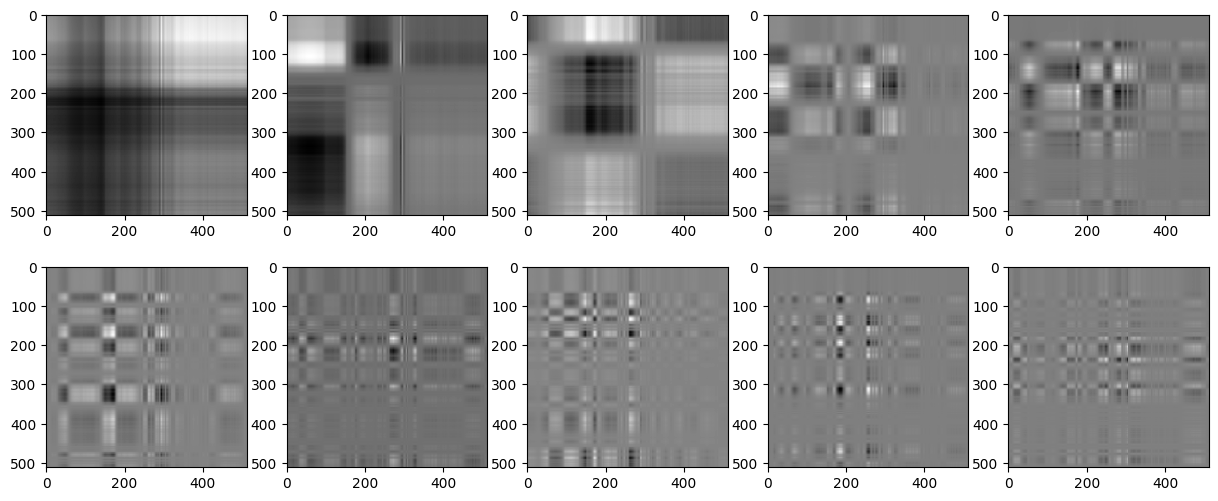

In [126]:
plt.figure(figsize=(15, 6))
pos = 1

# visualize some dyad of the decomposition
for k in range(0,10):
    
    # compute the dyad of rank k 
    dyad_k = s[k] * (U[:,k:k+1] @ VT[k:k+1,:])
    
    # plot the dyad 
    plt.subplot(2, 5, pos)
    plt.imshow(dyad_k, cmap = 'gray')

    pos += 1
    
plt.plot()
    
# we can see that the dyad_k contains less info when k in bigger

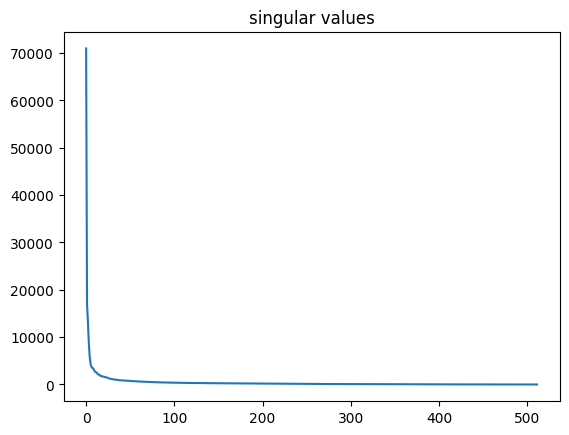

In [127]:
# plot the singular values of the image 
plt.plot(s)
plt.title('singular values') # the most info is contained in the first few singular values
plt.show()

#we can see that most of the values are close to zero 

In [133]:
# complete construction of S 
S = np.zeros((m,n))
S[:n,:n] = np.diag(s)

# k-rank approx 
err = []
cf = []
k=1
while k < 513:
    
    # compute the A_k
    A_k = U[:,:k] @ S[:k,:k] @ VT[:k,:]
    '''
    # plot the image 
    plt.imshow(A_k, cmap = 'gray')
    plt.title('k-rank approx of A')
    plt.show()
    '''
    # compute the relative error in 2-norm
    err_k = np.linalg.norm(A - A_k,2) / np.linalg.norm(A,2)
    err.append(err_k)
    
    # compute the compression factor 
    cf_k = 1 - (k*(m + n + 1))/(m*n)
    cf.append(cf_k)
    
    # update the rank approximation
    k+=1

# with a k = 50 we have a good resolution of the image 

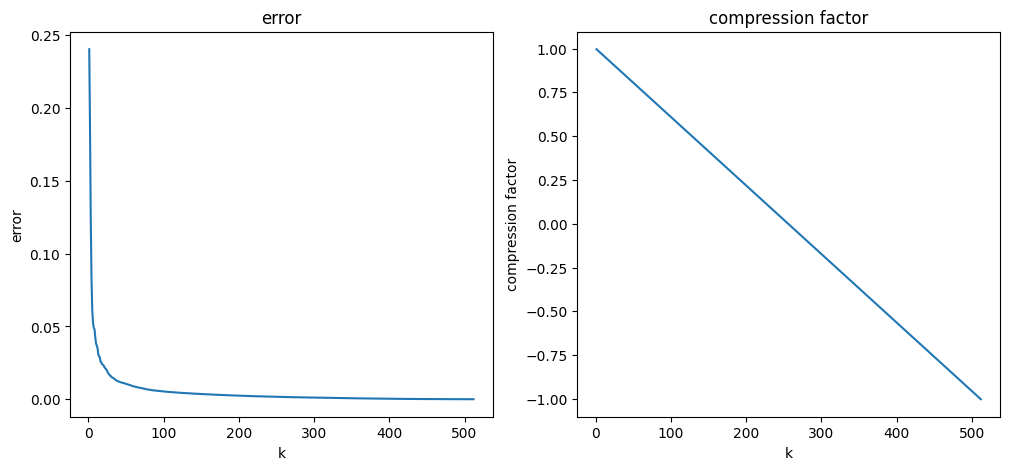

In [134]:
plt.figure(figsize=(12,5))

# plot the error
plt.subplot(1,2,1)
plt.plot(range(1,513), err)
plt.title('error')
plt.xlabel('k')
plt.ylabel('error')

# plot the compression factor 
plt.subplot(1,2,2)
plt.plot(range(1,513), cf)
plt.title('compression factor')
plt.xlabel('k')
plt.ylabel('compression factor')
plt.show()

# the compression factor is 1 - k(m+n+1) / (mn) 

In [135]:
'''
binary classification of MNIST digits with SVD decomposition 
'''

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

# load the dataset
df = pd.read_csv('train.csv')
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df = np.array(df)

X, Y = df[:,1:], df[:,0:1]

print(f"the shape of X is {X.shape}")
print(f"the shape of Y is {Y.shape}")

X = X.T
Y = Y.T

print(f"the shape of X is {X.shape}")
print(f"the shape of Y is {Y.shape}")

the shape of X is (42000, 784)
the shape of Y is (42000, 1)
the shape of X is (784, 42000)
the shape of Y is (1, 42000)


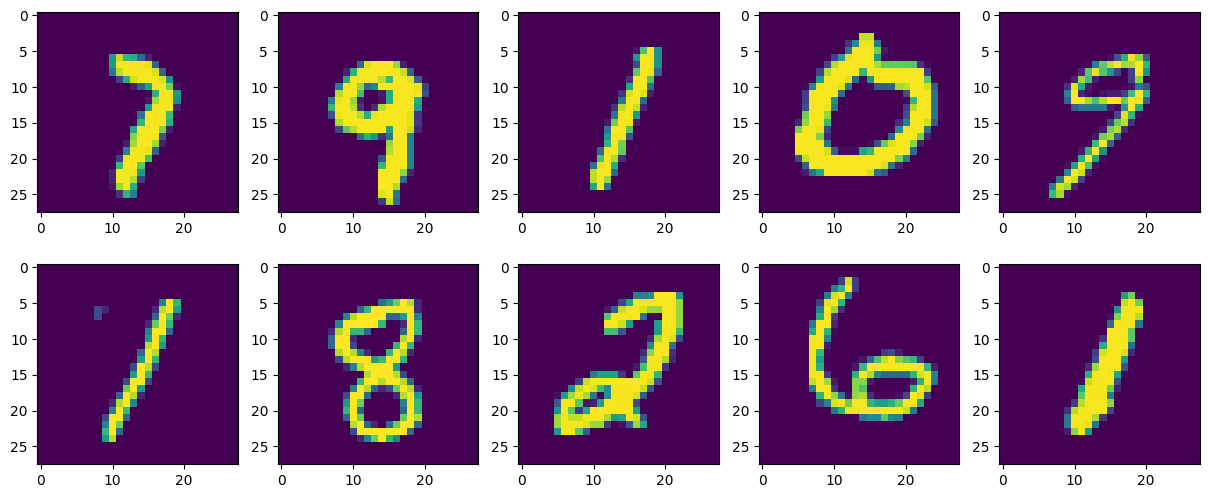

In [137]:
# compute the shape of X and the shape of each datapoints (image)
m,n = X.shape
mm = int(m**0.5) # shape of the images 

plt.figure(figsize=(15, 6))
pos = 1

# select a bunch of columns of X and plot them
for k in range(10):
    
    # chose randomly some entries of X and plot them
    idx = np.random.randint(0,n,1)
    plt.subplot(2, 5, pos)
    plt.imshow(np.reshape(X[:,idx],(mm,mm)))
    
    pos += 1
    
plt.show()

In [138]:
def select2digits(digit1, digit2, X, Y):
    m,n = X.shape
    idx = []
    count_digit1 = 0
    count_digit2 = 0
    for k in range(n):
        if Y[:,k] == digit1: 
            count_digit1 += 1
            idx.append(k)
        if Y[:,k] == digit2: 
            count_digit2 += 1
            idx.append(k)
    print(f"there are {count_digit1} samples for {digit1}")
    print(f"there are {count_digit2} samples for {digit2}")
    return X[:,idx], Y[:,idx]

def split_data(X, Y, train_size = 0.75):
    m,n = X.shape
    
    # create and shuffle the index 
    idx = np.array(range(n))
    np.random.shuffle(idx)
    
    # number of train samples
    Ntrain = int(round(n*train_size, 0))
    
    # split the idx
    idx_train = idx[:Ntrain]
    idx_test = idx[Ntrain:]
    
    # split the datasets
    Xtrain = X[:,idx_train]
    Xtest = X[:,idx_test]
    Ytrain = Y[:,idx_train]
    Ytest = Y[:,idx_test]
    
    print(f"there are {Ntrain} samples for train")
    print(f"there are {n - Ntrain} samples for test")
    
    return Xtrain, Xtest, Ytrain, Ytest

def select2SingleDigit(Xtrain, Xtest, Ytrain, Ytest, digit1, digit2):
    m,ntrain = Xtrain.shape
    m,ntest = Xtest.shape
    idx1_train = []
    idx1_test = []
    idx2_train = []
    idx2_test = []
    # train loop
    for k in range(ntrain):
        if Ytrain[:,k] == digit1: idx1_train.append(k)
        if Ytrain[:,k] == digit2: idx2_train.append(k)
    # test loop
    for k in range(ntest):
        if Ytest[:,k] == digit1: idx1_test.append(k)
        if Ytest[:,k] == digit2: idx2_test.append(k)
    X1train = Xtrain[:,idx1_train]
    X2train = Xtrain[:,idx2_train]
    X1test = Xtest[:,idx1_test]
    X2test = Xtest[:,idx2_test]
    Y1train = Ytrain[:,idx1_train]
    Y2train = Ytrain[:,idx2_train]
    Y1test = Ytest[:,idx1_test]
    Y2test = Ytest[:,idx2_test]
    return X1train, X2train, X1test, X2test, Y1train, Y2train, Y1test, Y2test

def accuracy(Xtest, Ytest, digit1, digit2, U1, U2):
    m,n = Xtest.shape
    n_true = 0
    for idx in range(n):
        
        # select a test sample
        y = Xtest[:,idx] 
        ytrue = Ytest[:,idx]
        
        # compute the projections on U1 and U2, and the distances
        dist1 = np.linalg.norm(y - (U1 @ (U1.T @ y)),2)
        dist2 = np.linalg.norm(y - (U2 @ (U2.T @ y)),2)

        # test the condition 
        if dist1 < dist2:
            if ytrue == digit1:
                n_true += 1
        else:
            if ytrue == digit2:
                n_true += 1
    
    acc = n_true / n
    print(f"the misclassification number is {acc}")
    return acc

In [139]:
# select targets 
digit1 = 3
digit2 = 4
print(f"the first target digit is {digit1}")
print(f"the second target digit is {digit2}")

X, Y = select2digits(digit1, digit2, X, Y)
Xtrain, Xtest, Ytrain, Ytest = split_data(X, Y, train_size = 0.75)
X1train, X2train, X1test, X2test, Y1train, Y2train, Y1test, Y2test = select2SingleDigit(Xtrain, Xtest, Ytrain, Ytest, digit1, digit2)

the first target digit is 3
the second target digit is 4
there are 4351 samples for 3
there are 4072 samples for 4
there are 6317 samples for train
there are 2106 samples for test


In [140]:
# compute svd decomposition
U1, s1, VT1 = np.linalg.svd(X1train, full_matrices = False) # for digit1
U2, s2, VT2 = np.linalg.svd(X2train, full_matrices = False) # for digit2

In [141]:
acc = accuracy(Xtest, Ytest, digit1, digit2, U1, U2)

the misclassification number is 0.9658119658119658


In [142]:
''' ternary classification of MNIST digits with SVD decomposition '''

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

# load the dataset
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
df = np.array(df)

X, Y = df[:,1:], df[:,0:1]

print(f"the shape of X is {X.shape}")
print(f"the shape of Y is {Y.shape}")

X = X.T
Y = Y.T

print(f"the shape of X is {X.shape}")
print(f"the shape of Y is {Y.shape}")

the shape of X is (42000, 784)
the shape of Y is (42000, 1)
the shape of X is (784, 42000)
the shape of Y is (1, 42000)


In [144]:
def select3digits(digit1, digit2, digit3, X, Y):
    m,n = X.shape
    idx = []
    count_digit1 = 0
    count_digit2 = 0
    count_digit3 = 0
    for k in range(n):
        if Y[:,k] == digit1: 
            count_digit1 += 1
            idx.append(k)
        if Y[:,k] == digit2: 
            count_digit2 += 1
            idx.append(k)
        if Y[:,k] == digit3: 
            count_digit3 += 1
            idx.append(k)
    print(f"there are {count_digit1} samples for {digit1}")
    print(f"there are {count_digit2} samples for {digit2}")
    print(f"there are {count_digit3} samples for {digit3}")
    return X[:,idx], Y[:,idx]

def split_data(X, Y, train_size = 0.75):
    m,n = X.shape
    
    # create and shuffle the index 
    idx = np.array(range(n))
    np.random.shuffle(idx)
    
    # number of train samples
    Ntrain = int(round(n*train_size, 0))
    
    # split the idx
    idx_train = idx[:Ntrain]
    idx_test = idx[Ntrain:]
    
    # split the datasets
    Xtrain = X[:,idx_train]
    Xtest = X[:,idx_test]
    Ytrain = Y[:,idx_train]
    Ytest = Y[:,idx_test]
    
    print(f"there are {Ntrain} samples for train")
    print(f"there are {n - Ntrain} samples for test")
    
    return Xtrain, Xtest, Ytrain, Ytest

def select3SingleDigit(Xtrain, Xtest, Ytrain, Ytest, digit1, digit2, digit3):
    m,ntrain = Xtrain.shape
    m,ntest = Xtest.shape
    idx1_train = []
    idx1_test = []
    idx2_train = []
    idx2_test = []
    idx3_train = []
    idx3_test = []
    # train loop
    for k in range(ntrain):
        if Ytrain[:,k] == digit1: idx1_train.append(k)
        if Ytrain[:,k] == digit2: idx2_train.append(k)
        if Ytrain[:,k] == digit3: idx3_train.append(k)
    # test loop
    for k in range(ntest):
        if Ytest[:,k] == digit1: idx1_test.append(k)
        if Ytest[:,k] == digit2: idx2_test.append(k)
        if Ytest[:,k] == digit3: idx3_test.append(k)
    X1train = Xtrain[:,idx1_train]
    X2train = Xtrain[:,idx2_train]
    X3train = Xtrain[:,idx3_train]
    X1test = Xtest[:,idx1_test]
    X2test = Xtest[:,idx2_test]
    X3test = Xtest[:,idx3_test]
    Y1train = Ytrain[:,idx1_train]
    Y2train = Ytrain[:,idx2_train]
    Y3train = Ytrain[:,idx3_train]
    Y1test = Ytest[:,idx1_test]
    Y2test = Ytest[:,idx2_test]
    Y3test = Ytest[:,idx3_test]
    return X1train, X2train, X3train, X1test, X2test, X3test, Y1train, Y2train, Y3train, Y1test, Y2test, Y3test

def accuracy(Xtest, Ytest, digit1, digit2, digit3, U1, U2, U3):
    m,n = Xtest.shape
    n_true = 0
    for idx in range(n):
        
        # select a test sample
        y = Xtest[:,idx] 
        ytrue = Ytest[:,idx]
        
        # compute the projections on U1 and U2, and the distances
        dist1 = np.linalg.norm(y - (U1 @ (U1.T @ y)),2)
        dist2 = np.linalg.norm(y - (U2 @ (U2.T @ y)),2)
        dist3 = np.linalg.norm(y - (U3 @ (U3.T @ y)),2)
        
        # test the condition 
        if dist1 < dist2:
            if dist1 < dist3:
                if ytrue == digit1:
                    n_true += 1
            else:
                if ytrue == digit3:
                    n_true += 1
        else:
            if dist2 < dist3:
                if ytrue == digit2:
                    n_true += 1
            else:
                if ytrue == digit3:
                    n_true += 1
    
    acc = n_true / n
    print(f"the misclassification number is {acc}")
    return acc  

In [145]:
# select targets 
digit1 = 3
digit2 = 4
digit3 = 7
print(f"the first target digit is {digit1}")
print(f"the second target digit is {digit2}")
print(f"the third target digit is {digit3}")

X, Y = select3digits(digit1, digit2, digit3, X, Y)
Xtrain, Xtest, Ytrain, Ytest = split_data(X, Y, train_size = 0.75)
X1train, X2train, X3train, X1test, X2test, X3test, Y1train, Y2train, Y3train, Y1test, Y2test, Y3test = select3SingleDigit(Xtrain, Xtest, Ytrain, Ytest, digit1, digit2, digit3)


the first target digit is 3
the second target digit is 4
the third target digit is 7
there are 4351 samples for 3
there are 4072 samples for 4
there are 4401 samples for 7
there are 9618 samples for train
there are 3206 samples for test


In [146]:
# compute svd decomposition
U1, s1, VT1 = np.linalg.svd(X1train, full_matrices = False) # for digit1
U2, s2, VT2 = np.linalg.svd(X2train, full_matrices = False) # for digit2
U3, s3, VT3 = np.linalg.svd(X3train, full_matrices = False) # for digit3

In [147]:
acc = accuracy(Xtest, Ytest, digit1, digit2, digit3, U1, U2, U3)

the misclassification number is 0.9463505926388023


In [148]:
''' clustering with PCA '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# load the dataset
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df = np.array(df)

X, Y = df[:,1:], df[:,0:1]

print(f"the shape of X is {X.shape}")
print(f"the shape of Y is {Y.shape}")

X = X.T
Y = Y.T

print(f"the shape of X is {X.shape}")
print(f"the shape of Y is {Y.shape}")

the shape of X is (42000, 784)
the shape of Y is (42000, 1)
the shape of X is (784, 42000)
the shape of Y is (1, 42000)


In [150]:
# chose the target digits
digit1 = 0
digit2 = 1
digit3 = 2
print(f"the target1 is {digit1}")
print(f"the target2 is {digit2}")
print(f"the target3 is {digit3}")

the target1 is 0
the target2 is 1
the target3 is 2


In [151]:
def select3digits(digit1, digit2, digit3, X, Y):
    m,n = X.shape
    idx = []
    count_digit1 = 0
    count_digit2 = 0
    count_digit3 = 0
    for k in range(n):
        if Y[:,k] == digit1: 
            count_digit1 += 1
            idx.append(k)
        if Y[:,k] == digit2: 
            count_digit2 += 1
            idx.append(k)
        if Y[:,k] == digit3: 
            count_digit3 += 1
            idx.append(k)
    print(f"there are {count_digit1} samples for {digit1}")
    print(f"there are {count_digit2} samples for {digit2}")
    print(f"there are {count_digit3} samples for {digit3}")
    return X[:,idx], Y[:,idx]

def split_data(X, Y, train_size = 0.75):
    m,n = X.shape
    
    # create and shuffle the index 
    idx = np.array(range(n))
    np.random.shuffle(idx)
    
    # number of train samples
    Ntrain = int(round(n*train_size, 0))
    
    # split the idx
    idx_train = idx[:Ntrain]
    idx_test = idx[Ntrain:]
    
    # split the datasets
    Xtrain = X[:,idx_train]
    Xtest = X[:,idx_test]
    Ytrain = Y[:,idx_train]
    Ytest = Y[:,idx_test]
    
    print(f"there are {Ntrain} samples for train")
    print(f"there are {n - Ntrain} samples for test")
    
    return Xtrain, Xtest, Ytrain, Ytest

# find the centroid of a matrix 
def centroid(X):
    c = np.mean(X, axis = 1)
    c = np.reshape(c, (c.shape[0], 1))
    return c

def select3SingleDigit(Xtrain, Xtest, Ytrain, Ytest, digit1, digit2, digit3):
    m,ntrain = Xtrain.shape
    m,ntest = Xtest.shape
    idx1_train = []
    idx1_test = []
    idx2_train = []
    idx2_test = []
    idx3_train = []
    idx3_test = []
    # train loop
    for k in range(ntrain):
        if Ytrain[:,k] == digit1: idx1_train.append(k)
        if Ytrain[:,k] == digit2: idx2_train.append(k)
        if Ytrain[:,k] == digit3: idx3_train.append(k)
    # test loop
    for k in range(ntest):
        if Ytest[:,k] == digit1: idx1_test.append(k)
        if Ytest[:,k] == digit2: idx2_test.append(k)
        if Ytest[:,k] == digit3: idx3_test.append(k)
    X1train = Xtrain[:,idx1_train]
    X2train = Xtrain[:,idx2_train]
    X3train = Xtrain[:,idx3_train]
    X1test = Xtest[:,idx1_test]
    X2test = Xtest[:,idx2_test]
    X3test = Xtest[:,idx3_test]
    Y1train = Ytrain[:,idx1_train]
    Y2train = Ytrain[:,idx2_train]
    Y3train = Ytrain[:,idx3_train]
    Y1test = Ytest[:,idx1_test]
    Y2test = Ytest[:,idx2_test]
    Y3test = Ytest[:,idx3_test]
    return X1train, X2train, X3train, X1test, X2test, X3test, Y1train, Y2train, Y3train, Y1test, Y2test, Y3test

def average_distance(X1, X2, X3, c1, c2, c3):

    # for each cluster compute the average distance from the respective centroid 
    m1, n1 = X1.shape
    m2, n2 = X2.shape
    m3, n3 = X3.shape
    adist1 = 0
    adist2 = 0
    adist3 = 0
    for i in range(n1):
        adist1 += np.linalg.norm(X1[:,i] - c1,2)
    for i in range(n2):
        adist2 += np.linalg.norm(X2[:,i] - c2,2)
    for i in range(n3):
        adist3 += np.linalg.norm(X3[:,i] - c3,2)
    adist1 /= n1
    adist2 /= n2
    adist3 /= n3

    print(f"the average distance of cluster of digit {digit1} from the respective centroid is {adist1} ")
    print(f"the average distance of cluster of digit {digit2} from the respective centroid is {adist2} ")
    print(f"the average distance of cluster of digit {digit3} from the respective centroid is {adist3} ")
    
    return adist1, adist2, adist3

def accuracy(Xtest, Ytest, c1, c2, c3, digit1, digit2, digit3):
    
    m,n = Xtest.shape
    
    # test the algorithm and compute the accuracy number 
    n_true = 0 # correct classifications
    
    for k in range(n):
        
        # select a sample from test set 
        y = Xtest[:,k]
        ytrue = Ytest[:,k]
        
        # compute the distance from each centroid 
        dist1 = np.linalg.norm(y - c1,2)
        dist2 = np.linalg.norm(y - c2,2)
        dist3 = np.linalg.norm(y - c3,2)
        
        # test the condition 
        if dist1 < dist2:
            if dist1 < dist3:
                if ytrue == digit1:
                    n_true += 1
            else:
                if ytrue == digit3:
                    n_true += 1
        else:
            if dist2 < dist3:
                if ytrue == digit2:
                    n_true += 1
            else:
                if ytrue == digit3:
                    n_true += 1
            
    acc = n_true/n
    print(f"the accuracy number is {acc}")
    return acc

there are 4132 samples for 0
there are 4684 samples for 1
there are 4177 samples for 2
there are 9745 samples for train
there are 3248 samples for test


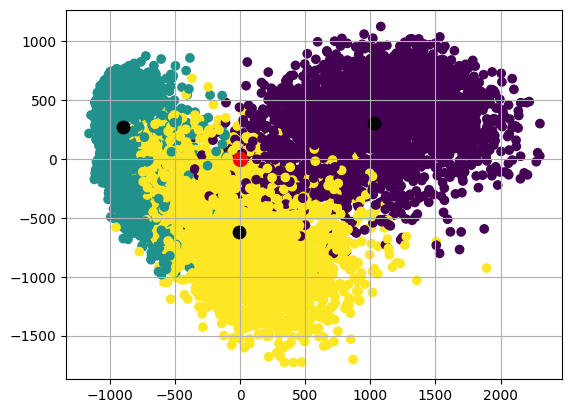

In [152]:
# perpare the data
X, Y = select3digits(digit1, digit2, digit3, X, Y)
Xtrain, Xtest, Ytrain, Ytest = split_data(X, Y)

# store the dimensions
mtrain, ntrain = Xtrain.shape
mtest, ntest = Xtest.shape

# centroid of global training set 
c_train = centroid(Xtrain)

# centering the dataset
Xtrainc = Xtrain - c_train

# compute the truncated sdv for training <---------------
k = 2 # size of the truncated decomposition
U_k = np.zeros((mtrain,k))
s_k = np.zeros((1,k))
VT_k = np.zeros((k,ntrain))
U_k, s_k, VT_k = np.linalg.svd(Xtrainc, full_matrices = False)

# compute the matrix Z
Ztrain = U_k.T @ Xtrainc

# centroid of global training set 
c_test = centroid(Xtest)

# centering the dataset
Xtestc = Xtest - c_test

# compute the truncated sdv for testing <-----------------
k = 2 # size of the truncated decomposition
U_k = np.zeros((mtest,k))
s_k = np.zeros((1,k))
VT_k = np.zeros((k,ntest))
U_k, s_k, VT_k = np.linalg.svd(Xtest, full_matrices = False)

# compute the matrix Z
Ztest = U_k.T @ Xtestc

# extract each cluster
X1train, X2train, X3train, X1test, X2test, X3test, Y1train, Y2train, Y3train, Y1test, Y2test, Y3test = select3SingleDigit(Ztrain, Ztest, Ytrain, Ytest, digit1, digit2, digit3)

# compute the centroid for each cluster
c1 = centroid(X1train)
c2 = centroid(X2train)
c3 = centroid(X3train)

if k == 2:
    # plot the clusters
    plt.scatter(Ztrain[0,:], Ztrain[1,:], c = Ytrain)
    plt.scatter(c1[0,:], c1[1,:], c = 'black', s = 80)
    plt.scatter(c2[0,:], c2[1,:], c = 'black', s = 80)
    plt.scatter(c3[0,:], c3[1,:], c = 'black', s = 80)
    plt.scatter(c_train[0,:], c_train[1,:], c = 'red', s = 100)
    plt.grid()
    plt.show()

In [153]:
print('-------- train ---------')
dist1_train, dist2_train, dist3_train = average_distance(X1train, X2train, X3train, c1, c2, c3)
print('-------- test  ---------')
dist1_test, dist2_test, dist3_test = average_distance(X2train, X2test, X3test, c1, c2, c3)

print(f"absolute difference for cluster of digit {digit1} is: {abs(dist1_train - dist1_test)}")
print(f"absolute difference for cluster of digit {digit2} is: {abs(dist2_train - dist2_test)}")
print(f"absolute difference for cluster of digit {digit3} is: {abs(dist3_train - dist3_test)}")

the average distance of cluster of digit 0 from the respective centroid is 58434.28603944835 
the average distance of cluster of digit 1 from the respective centroid is 42853.830791545195 
the average distance of cluster of digit 2 from the respective centroid is 53863.65449514303 
the average distance of cluster of digit 0 from the respective centroid is 42952.753724498005 
the average distance of cluster of digit 1 from the respective centroid is 42959.84771843449 
the average distance of cluster of digit 2 from the respective centroid is 53527.70026632831 
absolute difference for cluster of digit 0 is: 15481.532314950346
absolute difference for cluster of digit 1 is: 106.01692688929325
absolute difference for cluster of digit 2 is: 335.9542288147204


In [ ]:
acc_train = accuracy(Ztrain, Ytrain, c1, c2, c3, digit1, digit2, digit3)
acc_test = accuracy(Ztest, Ytest, c1, c2, c3, digit1, digit2, digit3)

In [ ]:
kmin = 2
kmax = 11

acc_test_vec = []
acc_train_vec = []

for k in range(kmin,kmax):
    
    print(f"-------------------- k = {k} --------------------")

    # compute the truncated sdv for training <---------------
    U_k = np.zeros((mtrain,k))
    s_k = np.zeros((1,k))
    VT_k = np.zeros((k,ntrain))
    U_k, s_k, VT_k = np.linalg.svd(Xtrainc, full_matrices = False)

    # compute the matrix Z
    Ztrain = U_k.T @ Xtrainc

    # compute the truncated sdv for testing <-----------------
    U_k = np.zeros((mtest,k))
    s_k = np.zeros((1,k))
    VT_k = np.zeros((k,ntest))
    U_k, s_k, VT_k = np.linalg.svd(Xtest, full_matrices = False)

    # compute the matrix Z
    Ztest = U_k.T @ Xtestc

    # extract each cluster
    X1train, X2train, X3train, X1test, X2test, X3test, Y1train, Y2train, Y3train, Y1test, Y2test, Y3test = select3SingleDigit(Ztrain, Ztest, Ytrain, Ytest, digit1, digit2, digit3)

    # compute the centroid for each cluster
    c1 = centroid(X1train)
    c2 = centroid(X2train)
    c3 = centroid(X3train)
    
    # compute the accuracy
    print('train')
    acc_train = accuracy(Xtrain, Ytrain, c1, c2, c3, digit1, digit2, digit3, n_tot = 1000)
    acc_train_vec.append(acc_train)
    print('test')
    acc_test = accuracy(Xtest, Ytest, c1, c2, c3, digit1, digit2, digit3, n_tot = 1000)
    acc_test_vec.append(acc_test)
    
plt.plot(range(kmin,kmax),acc_train_vec)
plt.plot(range(kmin,kmax), acc_test_vec)
plt.title('train and test accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

-------------------- k = 2 --------------------
train
the accuracy number is 0.298
test
the accuracy number is 0.289
-------------------- k = 3 --------------------
train
the accuracy number is 0.312
test
the accuracy number is 0.289
-------------------- k = 4 --------------------
train
the accuracy number is 0.327
test
the accuracy number is 0.317
-------------------- k = 5 --------------------
train
the accuracy number is 0.275
test
the accuracy number is 0.332
-------------------- k = 6 --------------------
train
the accuracy number is 0.307
test
the accuracy number is 0.324
-------------------- k = 7 --------------------
train
the accuracy number is 0.286
test
the accuracy number is 0.308
-------------------- k = 8 --------------------
train
the accuracy number is 0.311
test
the accuracy number is 0.324
-------------------- k = 9 --------------------
train
the accuracy number is 0.335
test
the accuracy number is 0.301
-------------------- k = 10 --------------------
train
the accur